In [3]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
from statsmodels.formula.api import ols
from statsmodels.formula.api import wls
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

In [4]:
df = pd.read_csv('pitchfork_albums_mult_categories_inc_no_artist_title.csv')

In [5]:
clusters = ['urban_cluster','classic_rock_cluster','traditional_cluster',
            'electronic_cluster','indie_cluster','alternative_cluster',
            'pop_cluster','punk_cluster','experimental_cluster']

In [6]:
def get_mean_for_genre_and_rating_focus(center_of_focus, cluster, cluster_df, col):
    '''get mean of a group of albums with rating R +/- 0.5'''
    min_of_focus = center_of_focus - 0.5
    max_of_focus = center_of_focus - 0.5
    n, min_max, mean, var, skew, kurt = stats.describe(cluster_df[(cluster_df['Rating'] <= min_of_focus) & 
                                                                  (cluster_df['Rating'] <= max_of_focus)][col])
    std = var**.5
    CIL = mean - 2*std
    CIU = mean + 2*std
    new_line = (cluster,center_of_focus,mean,CIL,CIU)
    return new_line

def create_df_of_all_means(df, group_of_clusters, col):
    '''place means of groups of albums with rating R +/- 0.5 in a dataframe'''
    all_lines = []
    for cluster in group_of_clusters:
        cluster_df = df[df[cluster]==1]
        for i in range(5,96,1):
            try:
                new_line = get_mean_for_genre_and_rating_focus(i/10, cluster, cluster_df, col)
                all_lines.append(new_line)
            except:
                continue
    all_averages_df = pd.DataFrame(all_lines,columns=['cluster','rating_center',col,'CIL','CIU'])
    return all_averages_df

def create_plot(df, col):
    '''create line plot of means for R +/- 0.5, incrementing R by 0.1'''
    for c in set(df['cluster']):
        r_a_df = df[df['cluster']==c]
        df[col] = df[col].fillna(0)
        plt.plot(r_a_df['rating_center'],r_a_df[col],label=c)
    plt.legend(loc='upper right',fontsize=14)

In [7]:
def get_means_and_create_plot(df,group_of_clusters,col):
    '''top level function for above three functions'''
    means_df = create_df_of_all_means(df, group_of_clusters, col)
    create_plot(means_df,col)

In [8]:
def set_plot_template(ax):
    '''set plot template'''
    ax.set_xlabel('Pitchfork Rating (+/- 0.5)', fontsize=14)
    ax.set_ylabel('Daily Playcount', fontsize=14)
    ax.tick_params(labelsize=14)
    return ax

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


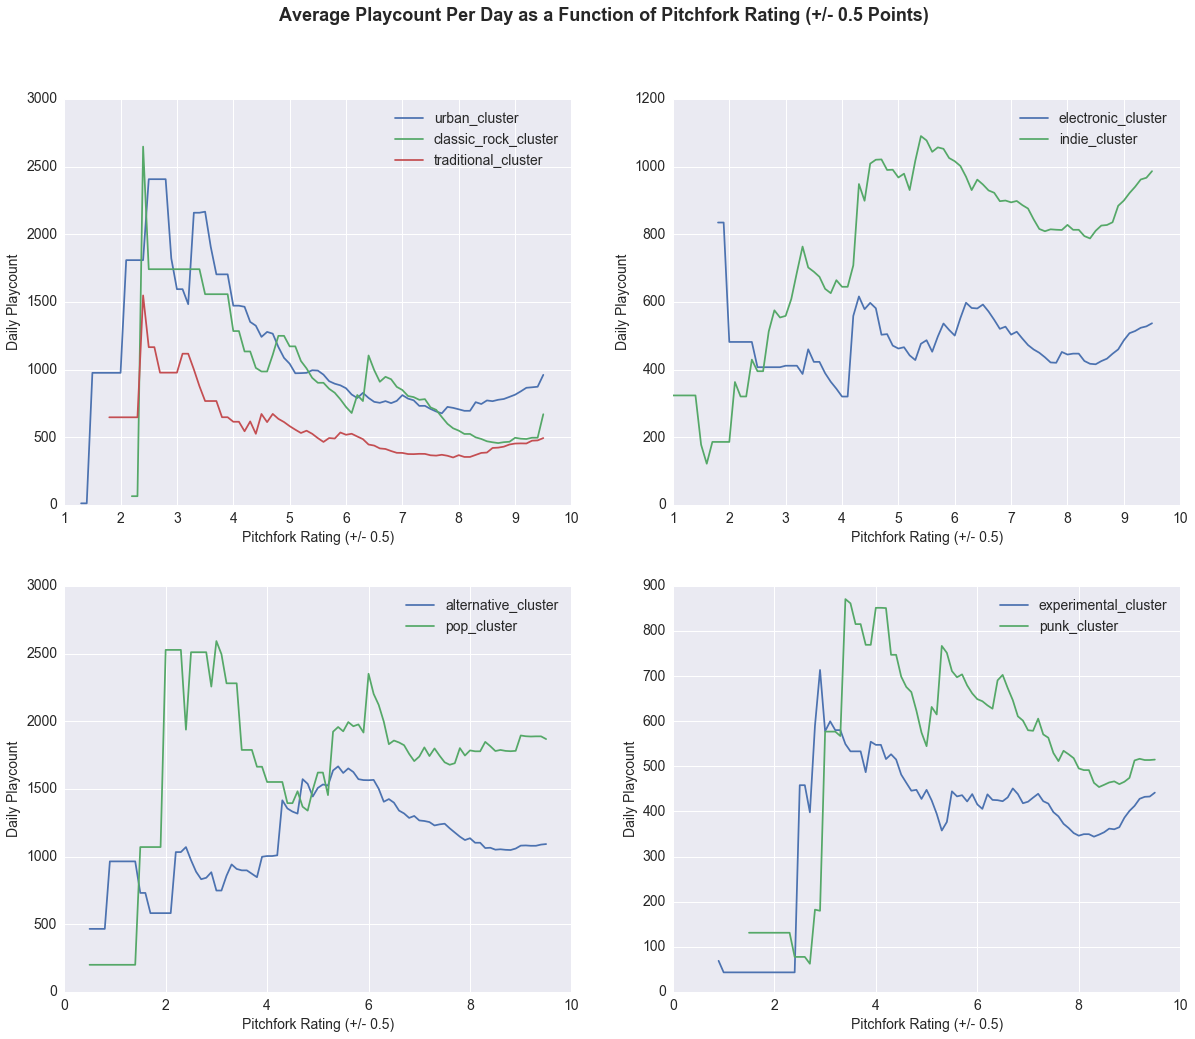

In [10]:
fig = plt.figure(figsize=(20, 16), dpi=80)

fig.suptitle('Average Playcount Per Day as a Function of Pitchfork Rating (+/- 0.5 Points)', fontsize=18, fontweight='bold')

ax1 = fig.add_subplot(2, 2, 1)
ax1 = set_plot_template(ax1)
get_means_and_create_plot(df,clusters[0:3],'playcount_per_day')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = set_plot_template(ax2)
get_means_and_create_plot(df,clusters[3:5],'playcount_per_day')

ax3 = fig.add_subplot(2, 2, 3)
ax3 = set_plot_template(ax3)
get_means_and_create_plot(df,clusters[5:7],'playcount_per_day')

ax4 = fig.add_subplot(2, 2, 4)
ax4 = set_plot_template(ax4)
get_means_and_create_plot(df,clusters[7:9],'playcount_per_day')

In [11]:
eight_and_higher_df = df[df['Rating']>=8.0]

                              OLS Regression Results                             
Dep. Variable:     log_playcount_per_day   R-squared:                       0.031
Model:                               OLS   Adj. R-squared:                  0.030
Method:                    Least Squares   F-statistic:                     66.34
Date:                   Tue, 06 Dec 2016   Prob (F-statistic):           6.45e-16
Time:                           14:32:58   Log-Likelihood:                -3093.5
No. Observations:                   2095   AIC:                             6191.
Df Residuals:                       2093   BIC:                             6202.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5563 

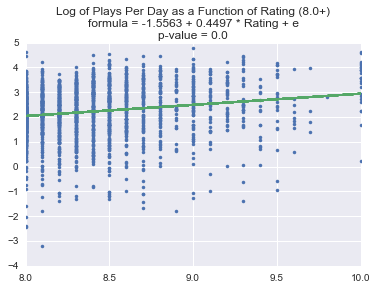

In [12]:
formula = 'log_playcount_per_day ~ Rating'
lm = ols(formula, eight_and_higher_df)
fit = lm.fit()
print(fit.summary())

intercept = round(np.float_(fit.params[0]),4)
slope = round(np.float_(fit.params[1]),4)

pval = round(np.float_(fit.pvalues[1]))

#formula = 'formula = ' + str(intercept) + ' + ' str(fit.params[1]) + ' * ' + 'Rating' + ' + ' + 'e'

plt.plot(eight_and_higher_df['Rating'], eight_and_higher_df['log_playcount_per_day'], '.')
plt.plot(eight_and_higher_df['Rating'], slope*eight_and_higher_df['Rating'] + intercept, '-')
plt.title('Log of Plays Per Day as a Function of Rating (8.0+)' + '\n' +
          'formula = ' + str(intercept) + ' + ' + str(slope) + ' * ' + 'Rating' + ' + ' + 'e' + '\n' +
          'p-value = ' + str(pval))

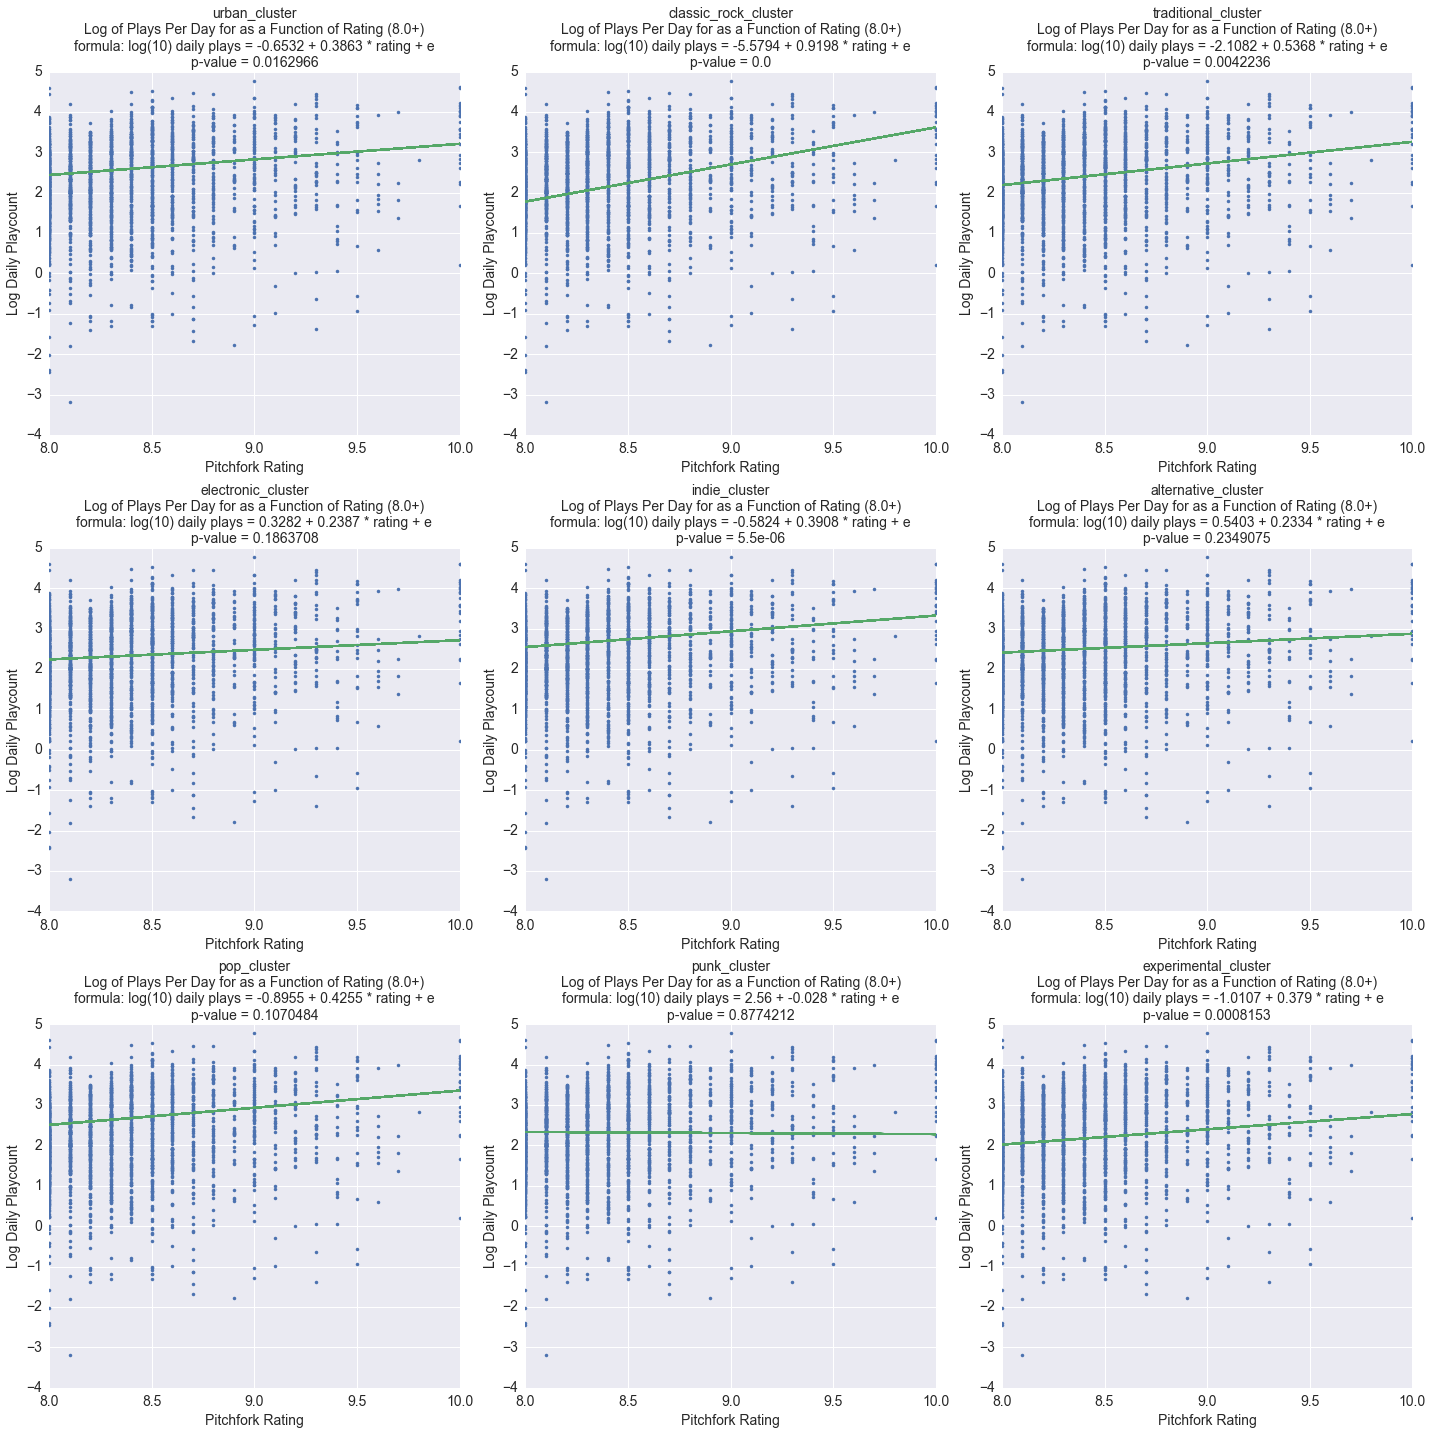

In [13]:
fig = plt.figure(figsize=(20, 20), dpi=80)
    
def make_8_up_plot(df, plot_num, cluster):
    '''create plot for means for R when R >= 8.0'''
        
    one_cluster_df = df[df[cluster]==1]

    formula = 'log_playcount_per_day ~ Rating'
    lm = ols(formula, one_cluster_df)
    fit = lm.fit()

    intercept = round(np.float_(fit.params[0]),4)
    slope = round(np.float_(fit.params[1]),4)
    pval = round(np.float_(fit.pvalues[1]),7)

    plot_title = str(str(cluster) + '\n' + 
                     'Log of Plays Per Day for as a Function of Rating (8.0+)' + '\n' +
                     'formula: ' + 'log(10) daily plays = ' + str(intercept) + ' + ' + str(slope) + ' * ' + 'rating' + ' + ' + 'e' + '\n' +
                     'p-value = ' + str(pval))
    
    ax_fig_num = fig.add_subplot(3,3,plot_num)
    ax_fig_num = set_plot_template(ax_fig_num)
    ax_fig_num.set_title(plot_title, fontsize=14)
    
    plt.plot(eight_and_higher_df['Rating'], eight_and_higher_df['log_playcount_per_day'], '.')
    plt.plot(eight_and_higher_df['Rating'], slope*eight_and_higher_df['Rating'] + intercept, '-')
    plt.tight_layout()

def set_plot_template(ax):
    '''create plot template'''
    ax.set_xlabel('Pitchfork Rating', fontsize=14)
    ax.set_ylabel('Log Daily Playcount', fontsize=14)
    ax.tick_params(labelsize=14)
    return ax

for i in range(0,len(clusters)):
    make_8_up_plot(eight_and_higher_df, i+1, clusters[i])

In [15]:
eight_and_higher_df['days_before_2016_02_26'] = eight_and_higher_df['days_since_2016_06_22'] - 117
formula = 'log_playcount_per_day ~ Rating + days_before_2016_02_26'
lm = ols(formula, eight_and_higher_df)
fit = lm.fit()
print(fit.summary())

                              OLS Regression Results                             
Dep. Variable:     log_playcount_per_day   R-squared:                       0.225
Model:                               OLS   Adj. R-squared:                  0.224
Method:                    Least Squares   F-statistic:                     302.8
Date:                   Tue, 06 Dec 2016   Prob (F-statistic):          3.15e-116
Time:                           14:35:46   Log-Likelihood:                -2859.8
No. Observations:                   2095   AIC:                             5726.
Df Residuals:                       2092   BIC:                             5743.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
print(fit.params[2])

-0.000313072034423


In [17]:
add_log_plays_per_day = fit.params[2]
eight_and_higher_df['plays_adjustment'] = eight_and_higher_df['days_before_2016_02_26'] * (-1 * add_log_plays_per_day)
eight_and_higher_df['adj_log_playcount_per_day'] = eight_and_higher_df['log_playcount_per_day'] + eight_and_higher_df['plays_adjustment']
eight_and_higher_df['adj_playcount_per_day'] = 10**eight_and_higher_df['adj_log_playcount_per_day']

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

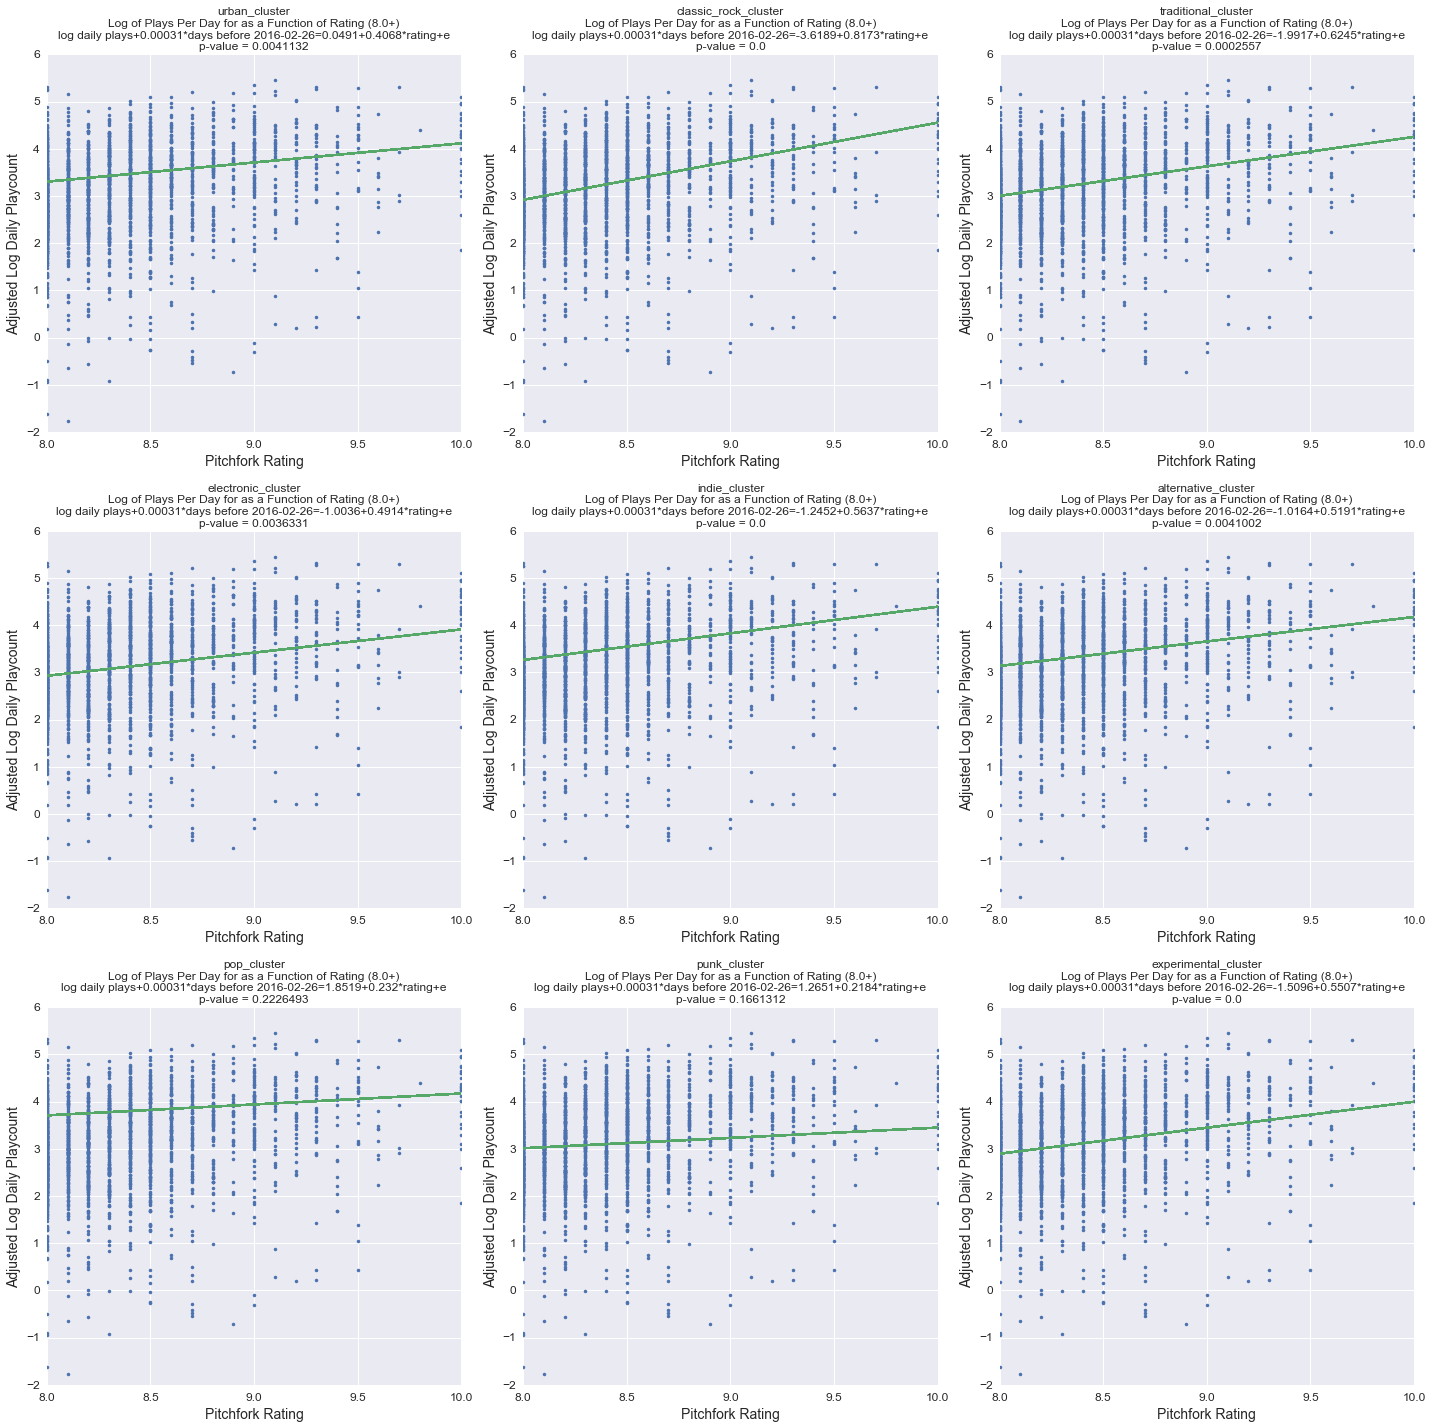

In [18]:
fig = plt.figure(figsize=(20, 20), dpi=80)
    
def make_8_up_plot(df, plot_num, cluster):
    '''create plot for means for R when R >= 8.0'''
    one_cluster_df = df[df[cluster]==1]

    formula = 'adj_log_playcount_per_day ~ Rating + days_before_2016_02_26'
    lm = ols(formula, one_cluster_df)
    fit = lm.fit()

    intercept = round(np.float_(fit.params[0]),4)
    slope = round(np.float_(fit.params[1]),4)
    pval = round(np.float_(fit.pvalues[1]),7)
    days_since = round(-1*np.float_(add_log_plays_per_day),5)

    plot_title = str(str(cluster) + '\n' + 
                     'Log of Plays Per Day for as a Function of Rating (8.0+)' + '\n' +
                     'log daily plays+' + str(days_since) + '*days before 2016-02-26='  + str(intercept) + '+' + str(slope) + '*' + 'rating' + '+' + 'e' + '\n' +
                     'p-value = ' + str(pval))
    
    ax_fig_num = fig.add_subplot(3,3,plot_num)
    ax_fig_num = set_plot_template(ax_fig_num)
    ax_fig_num.set_title(plot_title, fontsize=12)
    
    plt.plot(eight_and_higher_df['Rating'], eight_and_higher_df['adj_log_playcount_per_day'], '.')
    plt.plot(eight_and_higher_df['Rating'], slope*eight_and_higher_df['Rating'] + intercept, '-')
    plt.tight_layout()

def set_plot_template(ax):
    '''create plot template'''
    ax.set_xlabel('Pitchfork Rating', fontsize=14)
    ax.set_ylabel('Adjusted Log Daily Playcount', fontsize=14)
    ax.tick_params(labelsize=12)
    return ax

for i in range(0,len(clusters)):
    make_8_up_plot(eight_and_higher_df, i+1, clusters[i])